In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
Asma = np.load('Treino_teste/Asma.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = Asma['X_treino'], Asma['X_teste'], Asma['y_treino'], Asma['y_teste'], list(Asma['feature_names'])

In [3]:
len(X_treino)

30096

In [4]:
Asma_over = np.load('Treino_teste/Asma_Over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= Asma_over['X_treino'], Asma_over['X_teste'], Asma_over['y_treino'], Asma_over['y_teste'], list(Asma_over['feature_names'])

In [5]:
len(X_treino_over)

57134

In [6]:
Asma_under = np.load('Treino_teste/Asma_Under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = Asma_under['X_treino'], Asma_under['X_teste'], Asma_under['y_treino'], Asma_under['y_teste'], list(Asma_under['feature_names'])

In [7]:
len(X_treino_under)

29514

In [8]:
Asma_random_under = np.load('Treino_teste/Asma_RD_Under.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = Asma_random_under['X_treino'], Asma_random_under['X_teste'], Asma_random_under['y_treino'], Asma_random_under['y_teste'], list(Asma_random_under['feature_names'])

In [9]:
len(X_treino_rd_under)

3058

In [10]:
Asma_DSTO = np.load('Treino_teste/Asma_DSTO.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = Asma_DSTO['X_treino'], Asma_DSTO['X_teste'], Asma_DSTO['y_treino'], Asma_DSTO['y_teste'], list(Asma_DSTO['feature_names'])

In [11]:
len(X_treino_DSTO)

57134

## Parametros e funcoes

In [12]:
param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'n_estimators': Integer(50, 120),
    'max_features': Integer(2, 5)
}

# Modelos

### Modelo Padrao

In [13]:
bayes_search = BayesSearchCV(RandomForestClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 34, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 111})
Melhor pontuação de validação cruzada: 0.95


In [14]:
best_model_bayes = bayes_search.best_estimator_

### Resultados

In [15]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.95


In [16]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.73      0.02      0.05       681
           2       0.95      1.00      0.97     12218

    accuracy                           0.95     12899
   macro avg       0.84      0.51      0.51     12899
weighted avg       0.94      0.95      0.92     12899



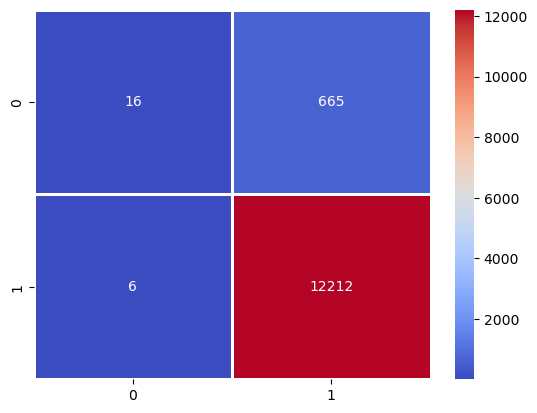

In [17]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Variáveis mais relevantes:
P00104: 0.16309518003869122
P00404: 0.13844738047480534
C008: 0.1325180615943892
V0022: 0.06319107014530667
A02201|A02305|A02306: 0.05019302811488804
P034|P035: 0.044884706761494524
M01601: 0.04408303515322439
Q11604: 0.041878658309017464
IMC: 0.040824893724322395
C004: 0.03598417681199025
C009: 0.032776912391620415
N010: 0.03145375024720248
P03701|P03702: 0.030380519713135722
P05901|P05902|P05903|P05904: 0.028590252672719366
C00301: 0.027052157241624526
P053: 0.025399063162915046
P050|P052: 0.016330480686051314
V0001: 0.015544457498750889
Q092: 0.013275102095985017
C006: 0.01239353280986426
Q11006: 0.011703580352001506


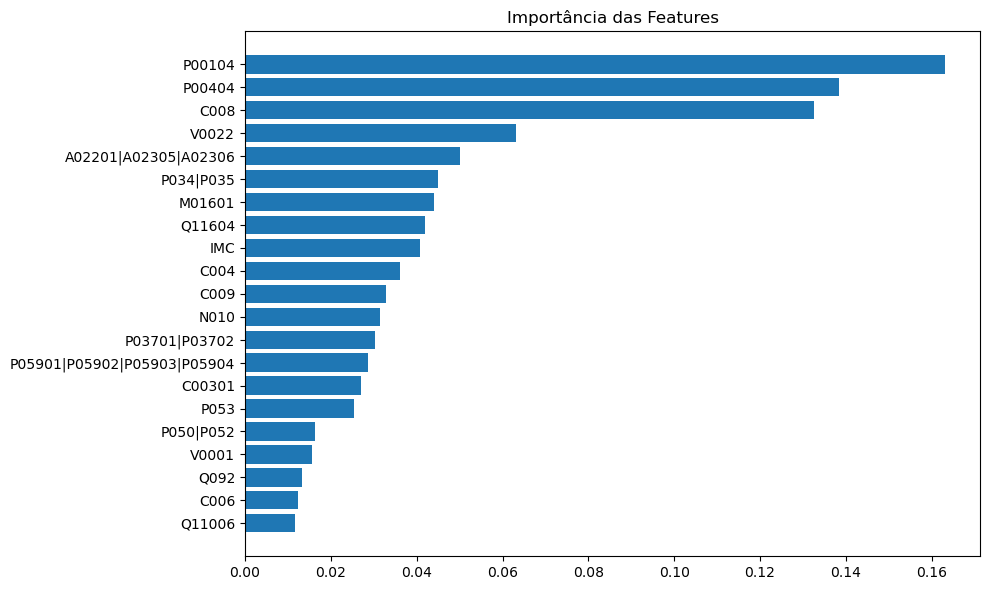

In [18]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### OverSampling

In [19]:
bayes_search.fit(X_treino_over, y_treino_over)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 40, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120})
Melhor pontuação de validação cruzada: 0.95


In [20]:
best_model_bayes = bayes_search.best_estimator_

In [21]:
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [22]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.12      0.10      0.11       681
           2       0.95      0.96      0.96     12218

    accuracy                           0.91     12899
   macro avg       0.54      0.53      0.53     12899
weighted avg       0.91      0.91      0.91     12899



Variáveis mais relevantes:
P00104: 0.11428151011613898
P00404: 0.11395057476887542
C008: 0.10343031496468928
C009: 0.07107163787288051
M01601: 0.059922842863951796
V0022: 0.05346526991637704
A02201|A02305|A02306: 0.04335775728307981
P053: 0.04220432471714588
Q092: 0.03927960075723465
P03701|P03702: 0.03800961451317853
IMC: 0.03748878379247458
N010: 0.03602994714877651
P034|P035: 0.03496122392749408
P050|P052: 0.033071233094032905
Q11604: 0.032956656739698074
C004: 0.03074980189519571
P05901|P05902|P05903|P05904: 0.027868057994740736
V0001: 0.02613774148878058
Q11006: 0.02357741785761807
C00301: 0.02210879421590127
C006: 0.016076894071735813


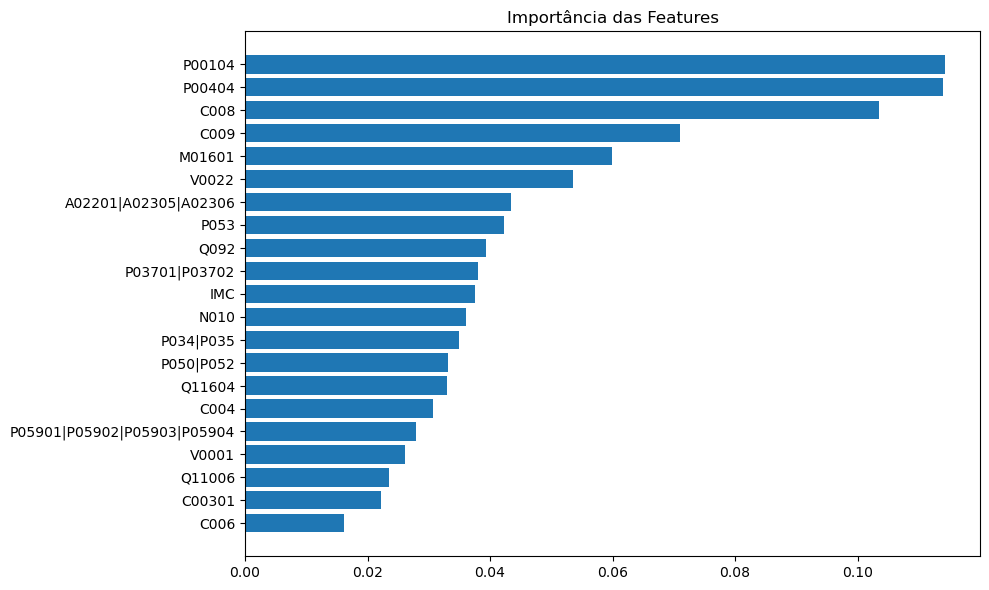

In [23]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### UnderSampling

In [24]:
bayes_search.fit(X_treino_under, y_treino_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 56})
Melhor pontuação de validação cruzada: 0.95


In [25]:
best_model_bayes = bayes_search.best_estimator_

In [26]:
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [27]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.68      0.02      0.05       681
           2       0.95      1.00      0.97     12218

    accuracy                           0.95     12899
   macro avg       0.81      0.51      0.51     12899
weighted avg       0.93      0.95      0.92     12899



Variáveis mais relevantes:
P00104: 0.1538066782326094
P00404: 0.13941135583845043
C008: 0.13676038516070665
V0022: 0.07054761076916465
A02201|A02305|A02306: 0.05597131719862265
M01601: 0.04859104133695289
P034|P035: 0.046507524153214096
IMC: 0.042741939882151664
C009: 0.037442498177250975
C004: 0.03654408085037037
P03701|P03702: 0.033690573555914885
N010: 0.02912184198297318
C00301: 0.02793895027257979
P05901|P05902|P05903|P05904: 0.02667526019590278
P053: 0.02505115227218111
Q11604: 0.020812027504635414
P050|P052: 0.01693795123094425
V0001: 0.016622860036027122
C006: 0.015028155768640509
Q092: 0.009912285756167873
Q11006: 0.009884509824539405


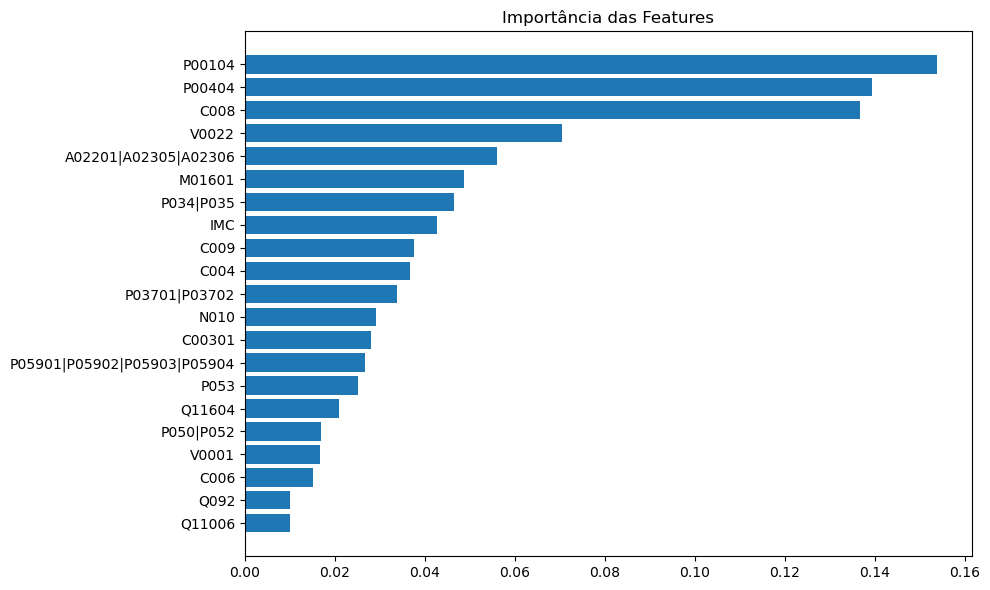

In [28]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### Random UnderSampling

In [29]:
bayes_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 7, 'min_samples_split': 18, 'n_estimators': 112})
Melhor pontuação de validação cruzada: 0.61


In [30]:
best_model_bayes = bayes_search.best_estimator_

In [31]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [32]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.08      0.52      0.14       681
           2       0.96      0.67      0.79     12218

    accuracy                           0.66     12899
   macro avg       0.52      0.59      0.46     12899
weighted avg       0.91      0.66      0.75     12899



Variáveis mais relevantes:
N010: 0.1714152220089896
Q11604: 0.1704142661117755
Q092: 0.08317041122513937
C008: 0.07638020814937947
P00104: 0.07149367952735033
P00404: 0.060683897650828954
V0001: 0.05237196181297528
C006: 0.03976647591023632
M01601: 0.03551051443162705
Q11006: 0.03181223691125053
IMC: 0.027612251124775077
P034|P035: 0.025982082112597338
V0022: 0.023679824395966807
P05901|P05902|P05903|P05904: 0.02221130655155085
C00301: 0.019341928493464923
C004: 0.016494351420664907
P03701|P03702: 0.016374294415194234
C009: 0.01567724272079534
A02201|A02305|A02306: 0.01497607150643506
P053: 0.01395858947817125
P050|P052: 0.010673184040831774


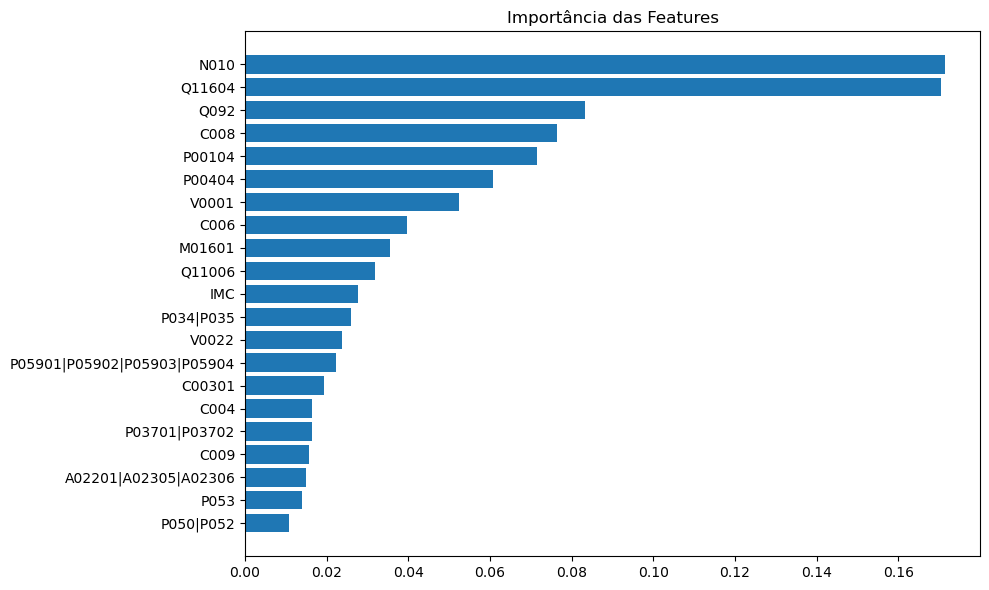

In [33]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### DSTO

In [34]:
bayes_search.fit(X_treino_DSTO, y_treino_DSTO)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'entropy', 'max_depth': 44, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 18, 'n_estimators': 54})
Melhor pontuação de validação cruzada: 0.97


In [35]:
best_model_bayes = bayes_search.best_estimator_

In [36]:
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [37]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       681
           2       0.95      1.00      0.97     12218

    accuracy                           0.95     12899
   macro avg       0.47      0.50      0.49     12899
weighted avg       0.90      0.95      0.92     12899



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Variáveis mais relevantes:
Q11604: 0.20792462879369575
C004: 0.15113524403700862
Q11006: 0.13760069695890315
Q092: 0.10742834325195959
P05901|P05902|P05903|P05904: 0.05700280008638178
C006: 0.04513584061321923
V0001: 0.04104170527226935
P053: 0.03988030450097766
P03701|P03702: 0.0368899184025889
P034|P035: 0.03371610333020547
P050|P052: 0.03060693857572641
N010: 0.030202825610935603
M01601: 0.015983511755209085
C00301: 0.014430208584309143
A02201|A02305|A02306: 0.010286705724902917
C009: 0.008751071804271437
V0022: 0.008539889135774704
P00104: 0.007287390305380782
C008: 0.007106295113264994
P00404: 0.006802860895393493
IMC: 0.002246717247622094


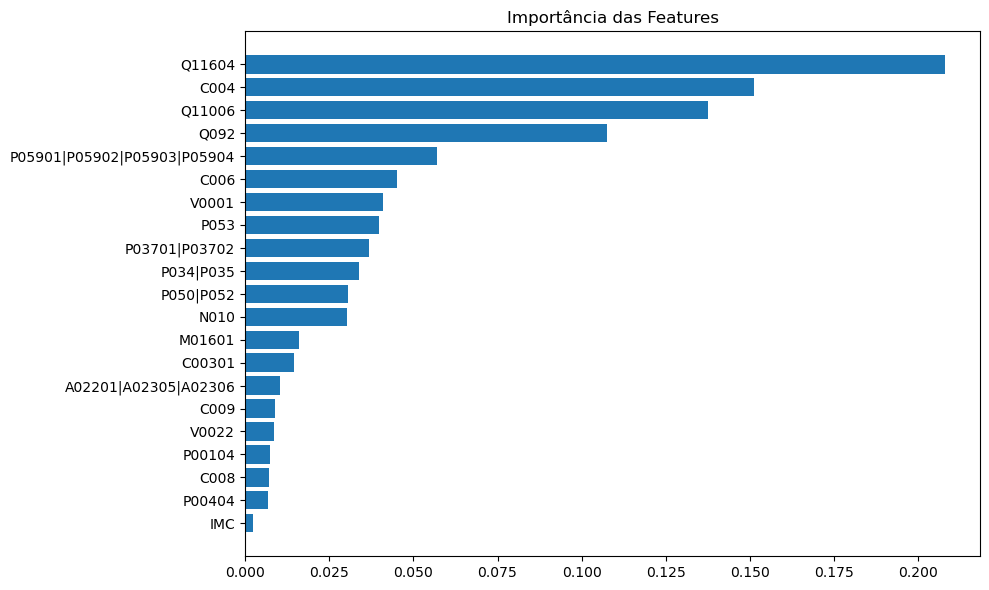

In [38]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()